In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
df=pd.read_csv("Wine_clust.csv")

print(df.head())


print(df.info())

print(df.describe())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

In [6]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [8]:
#Optimal Number of Clusters (K-Means)

In [10]:
#Elbow Method

C:\Users\arjun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\arjun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\arjun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\arjun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

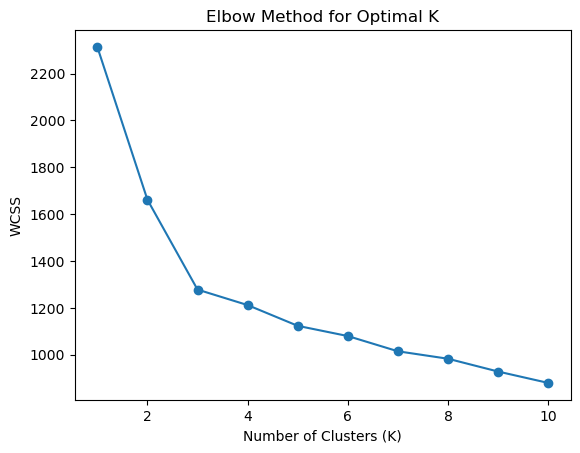

In [12]:
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [15]:
#Silhouette Score (Validation)

C:\Users\arjun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\arjun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\arjun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\arjun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

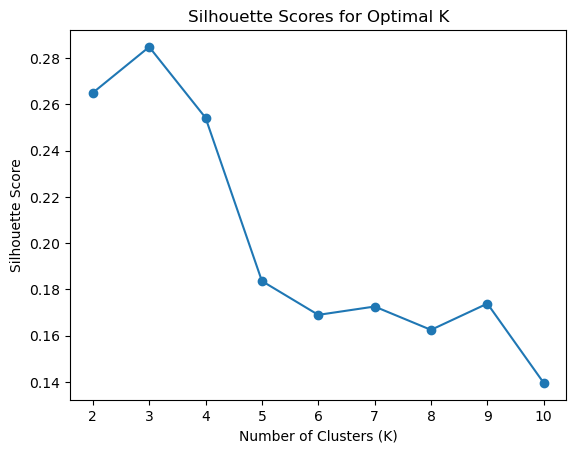

In [17]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

In [20]:
#Apply K-Means Clustering (Optimal K=3)

C:\Users\arjun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


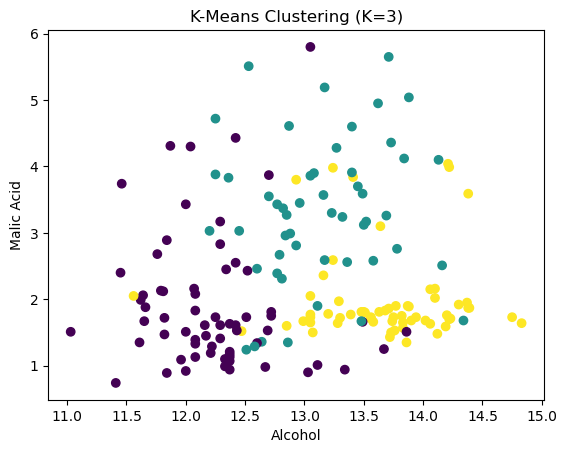

In [22]:
# Fit K-Means with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataset
df['Cluster'] = clusters

# Visualize clusters (using 2 features for simplicity)
plt.scatter(df['Alcohol'], df['Malic_Acid'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('K-Means Clustering (K=3)')
plt.show()

In [25]:
#Hierarchical Clustering (Agglomerative)

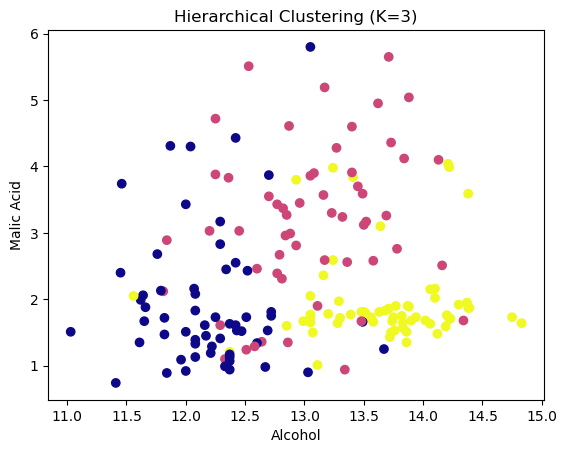

In [27]:
# Fit Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_clusters = hierarchical.fit_predict(scaled_data)

# Add to dataframe
df['Hierarchical_Cluster'] = hierarchical_clusters

# Visualize
plt.scatter(df['Alcohol'], df['Malic_Acid'], c=df['Hierarchical_Cluster'], cmap='plasma')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Hierarchical Clustering (K=3)')
plt.show()

In [30]:
#DBSCAN (Density-Based Clustering)

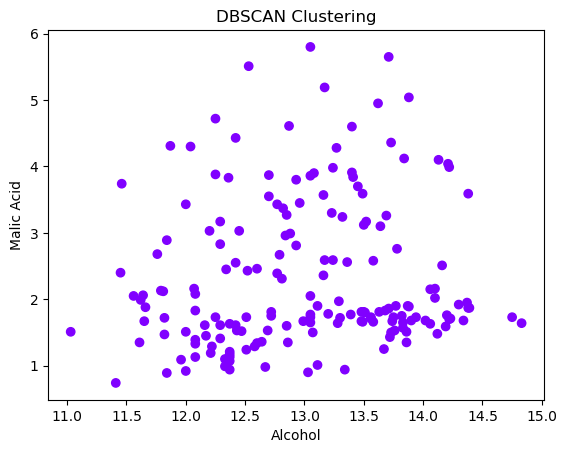

In [32]:
# Fit DBSCAN (adjust eps and min_samples as needed)
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_data)

# Add to dataframe
df['DBSCAN_Cluster'] = dbscan_clusters

# Visualize
plt.scatter(df['Alcohol'], df['Malic_Acid'], c=df['DBSCAN_Cluster'], cmap='rainbow')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('DBSCAN Clustering')
plt.show()

In [35]:
#Compare Results

In [37]:
print("K-Means Cluster Counts:")
print(df['Cluster'].value_counts())

print("\nHierarchical Cluster Counts:")
print(df['Hierarchical_Cluster'].value_counts())

print("\nDBSCAN Cluster Counts:")
print(df['DBSCAN_Cluster'].value_counts())

K-Means Cluster Counts:
Cluster
0    65
2    62
1    51
Name: count, dtype: int64

Hierarchical Cluster Counts:
Hierarchical_Cluster
2    64
0    58
1    56
Name: count, dtype: int64

DBSCAN Cluster Counts:
DBSCAN_Cluster
-1    178
Name: count, dtype: int64
